In [1]:
%matplotlib inline
import os,random
os.environ["KERAS_BACKEND"] = "theano"
os.environ["THEANO_FLAGS"]  = "device=cuda%d"%(1)
import numpy as np
import theano as th
import theano.tensor as T
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *

import matplotlib.pyplot as plt
import seaborn as sns
import pickle, random, sys, keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization,LSTM


In [3]:
# Loading the dataset
with open("../input/rml201610a-dict/RML2016.10a_dict.dat",'rb') as file:
    Xd = pickle.load(file,encoding='bytes')

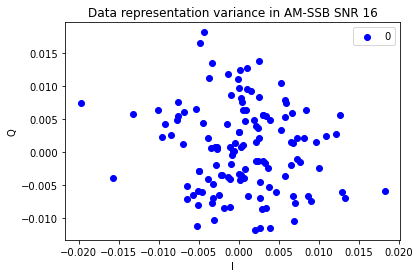

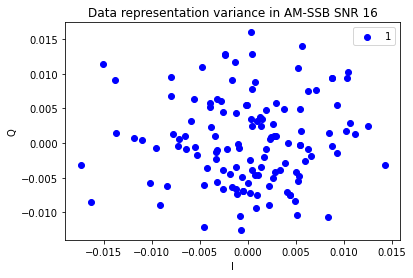

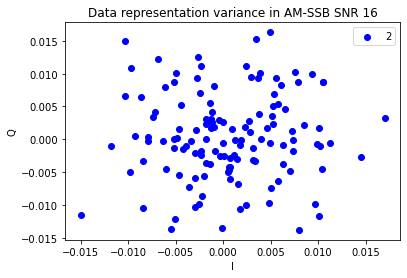

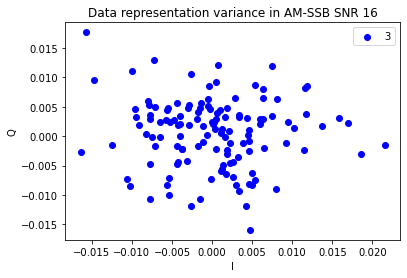

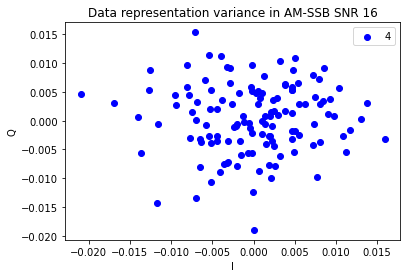

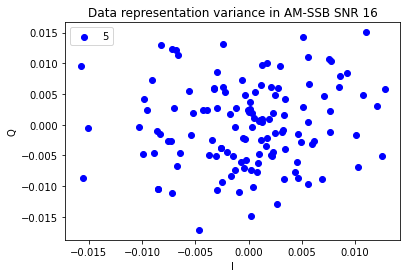

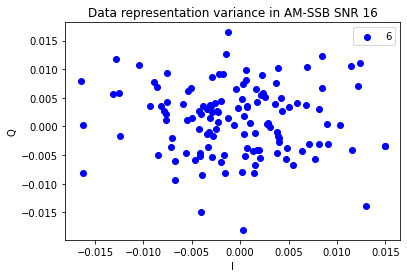

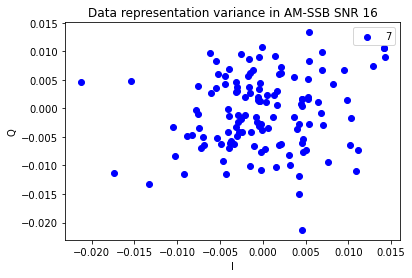

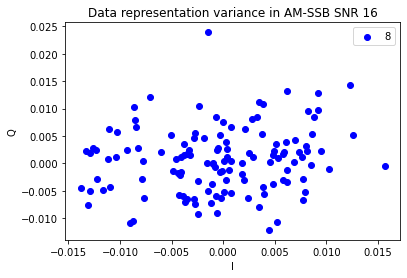

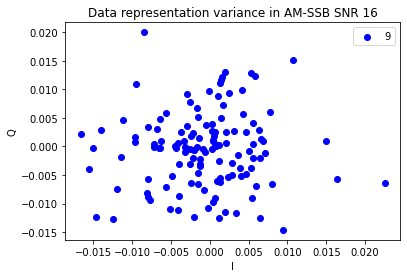

In [4]:
# Ploting for AM-SSB in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'AM-SSB'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)


df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    
    
for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in AM-SSB SNR 16")
    plt.legend()
    plt.show()


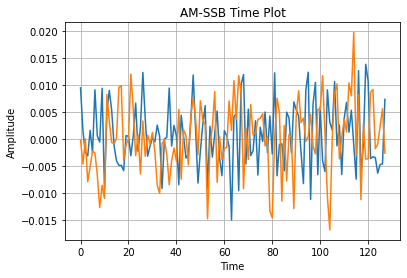

In [5]:
# Ploting AM-SSB in time domain
plt.plot(Xd[b'AM-SSB',4][2,0])
plt.plot(Xd[b'AM-SSB',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("AM-SSB Time Plot")
plt.grid(b=True, axis='both')

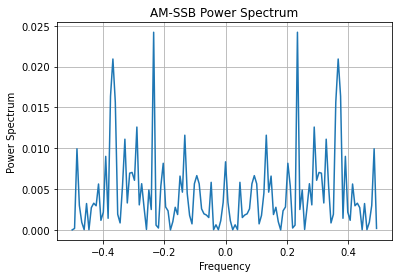

In [6]:
data = Xd[b'AM-SSB',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("AM-SSB Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


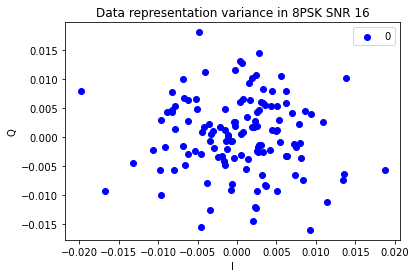

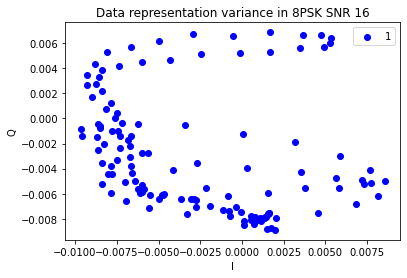

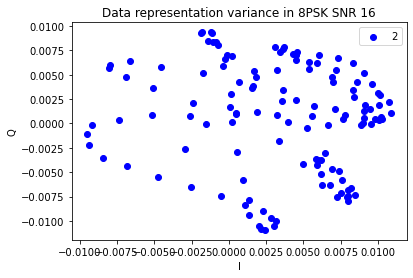

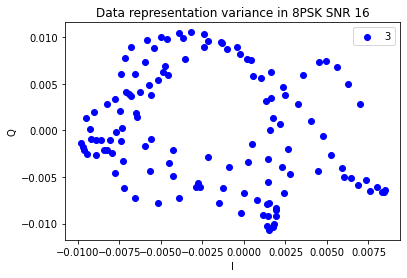

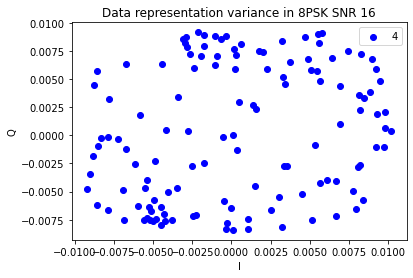

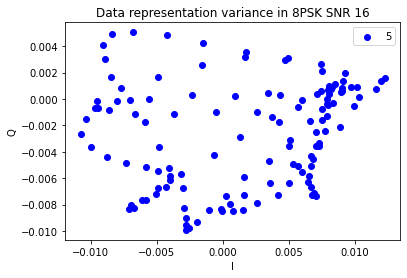

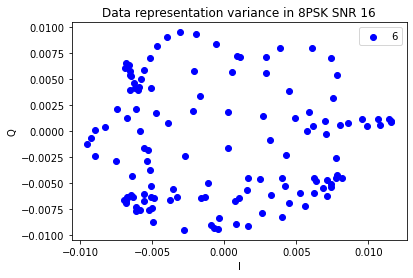

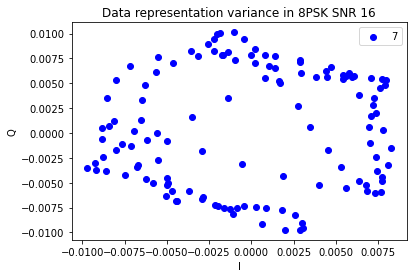

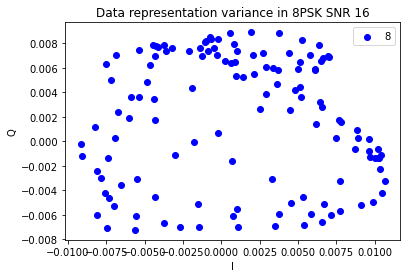

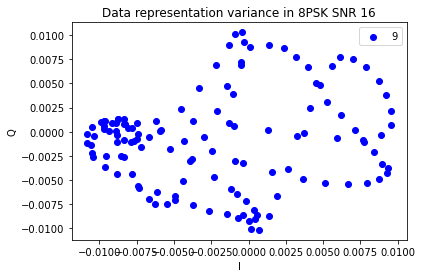

In [7]:
# Ploting for 8PSK in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'8PSK'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in 8PSK SNR 16")
    plt.legend()
    plt.show()



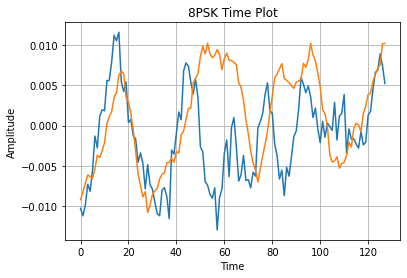

In [8]:
# Ploting 8PSK in time domain
plt.plot(Xd[b'8PSK',4][2,0])
plt.plot(Xd[b'8PSK',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("8PSK Time Plot")
plt.grid(b=True, axis='both')

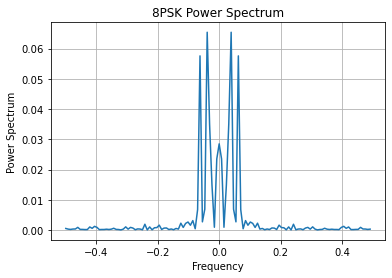

In [9]:
data = Xd[b'8PSK',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("8PSK Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


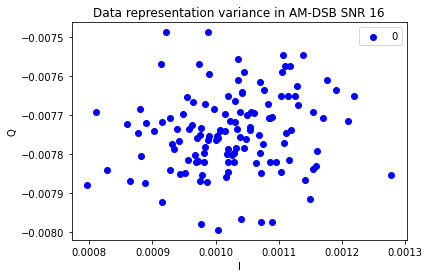

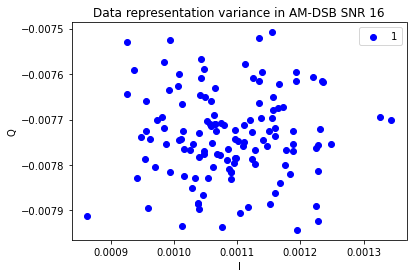

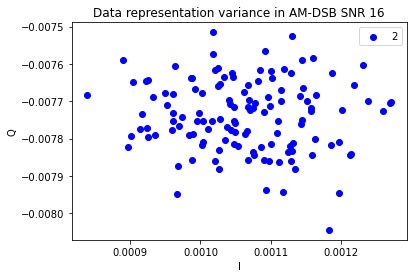

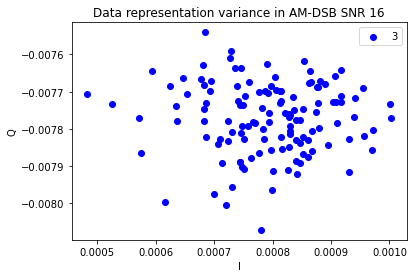

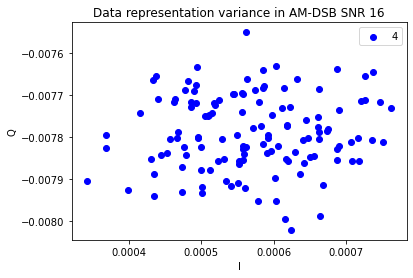

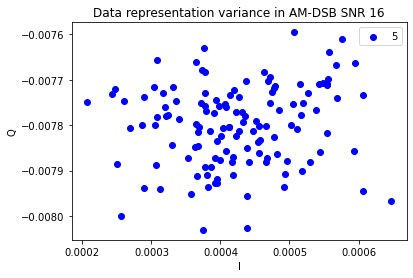

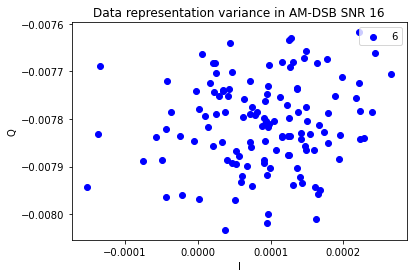

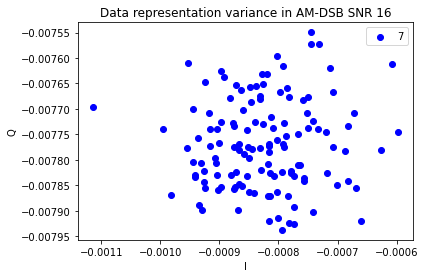

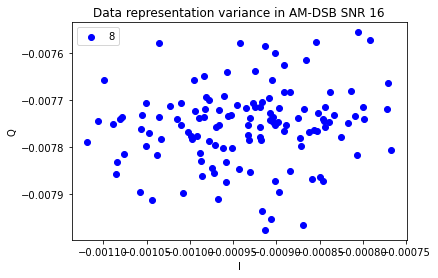

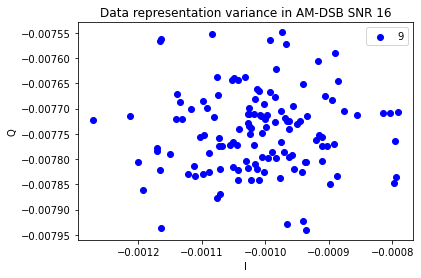

In [10]:
# Ploting for AM-DSB in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'AM-DSB'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in AM-DSB SNR 16")
    plt.legend()
    plt.show()

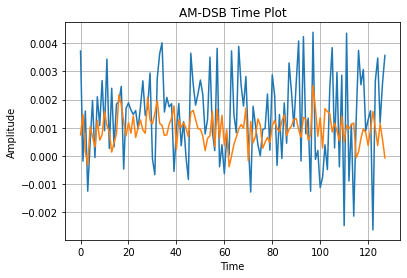

In [11]:
# Ploting AM-DSB in time domain
plt.plot(Xd[b'AM-DSB',4][2,0])
plt.plot(Xd[b'AM-DSB',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("AM-DSB Time Plot")
plt.grid(b=True, axis='both')

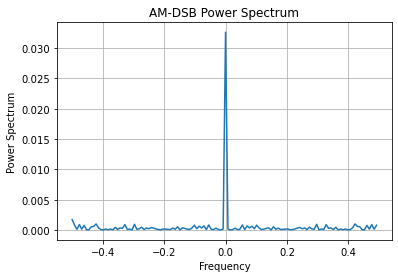

In [12]:
data = Xd[b'AM-DSB',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("AM-DSB Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


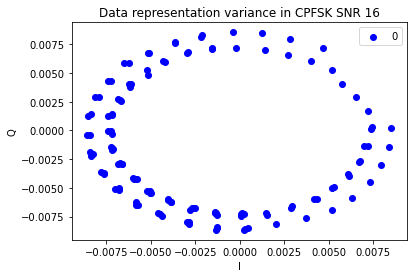

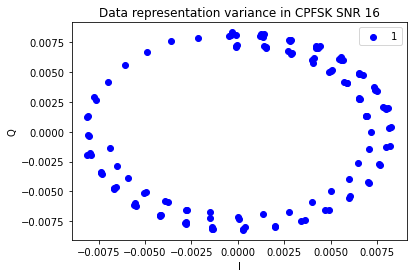

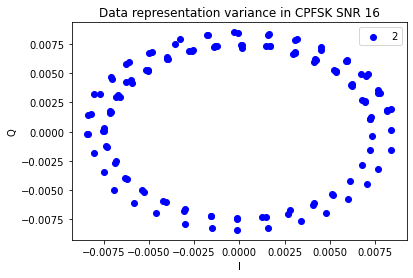

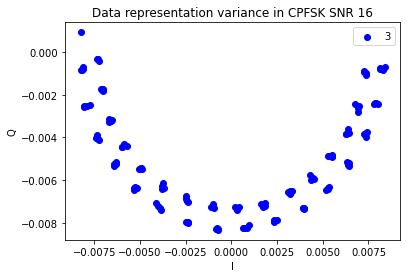

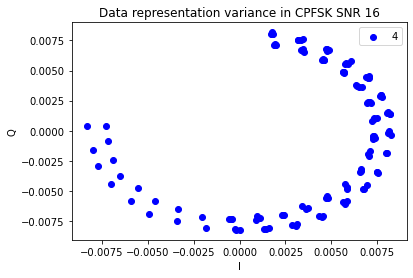

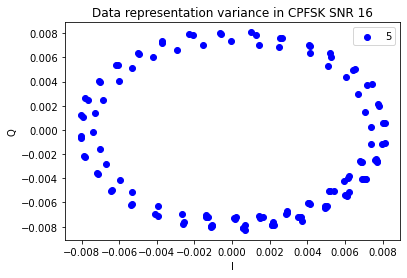

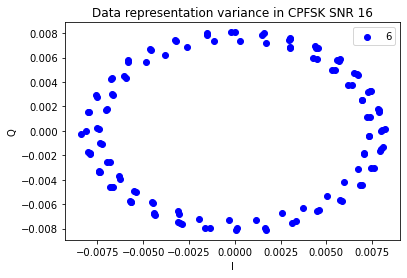

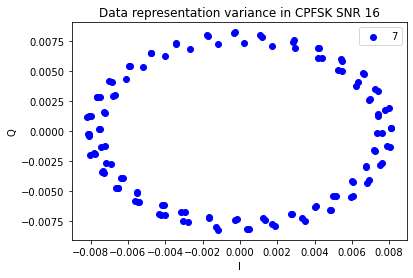

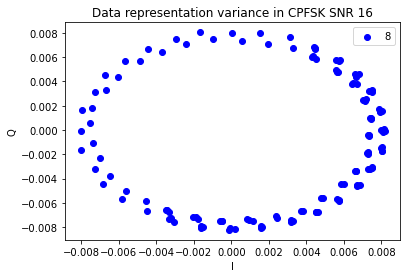

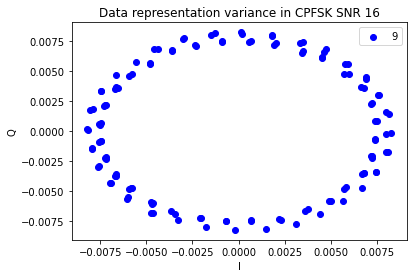

In [13]:
# Ploting for CPFSK in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'CPFSK'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in CPFSK SNR 16")
    plt.legend()
    plt.show()

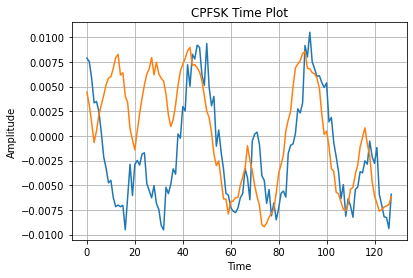

In [14]:
# Ploting CPFSK in time domain
plt.plot(Xd[b'CPFSK',4][2,0])
plt.plot(Xd[b'CPFSK',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("CPFSK Time Plot")
plt.grid(b=True, axis='both')

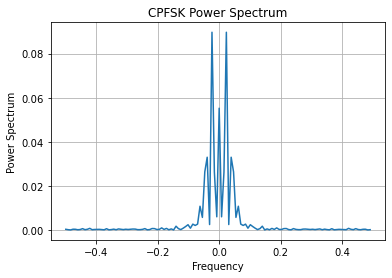

In [15]:
data = Xd[b'CPFSK',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("CPFSK Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


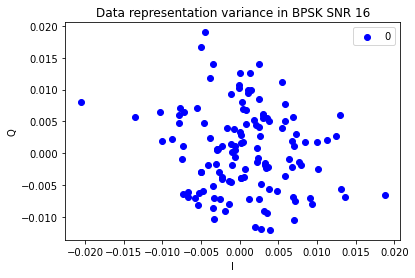

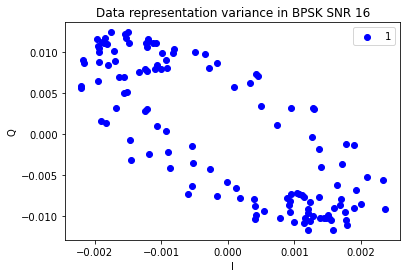

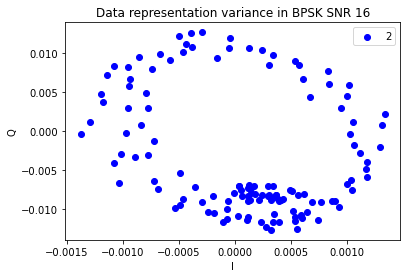

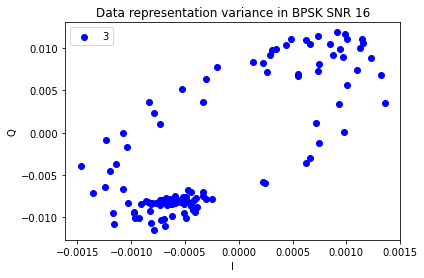

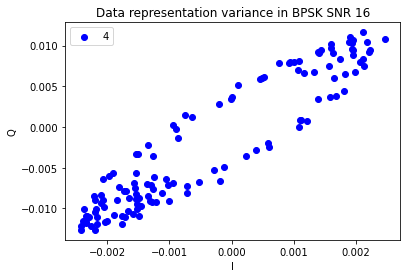

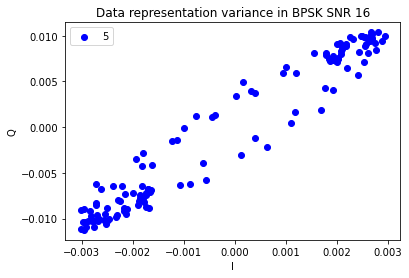

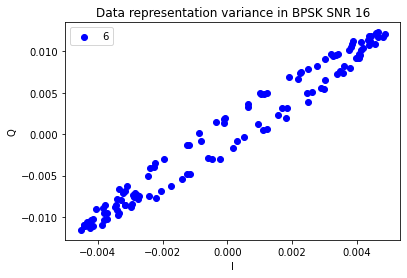

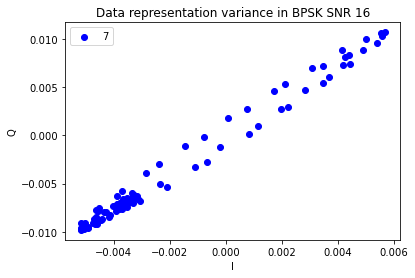

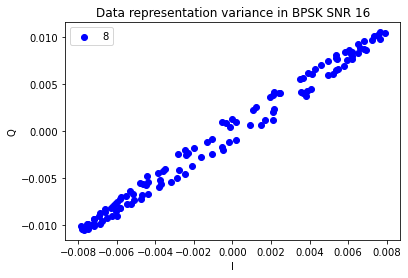

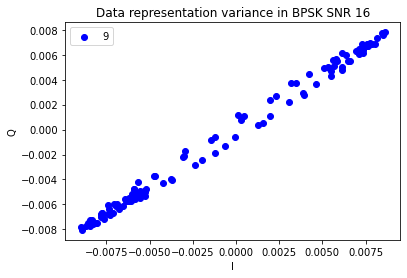

In [16]:
# Ploting for BPSK in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'BPSK'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in BPSK SNR 16")
    plt.legend()
    plt.show()

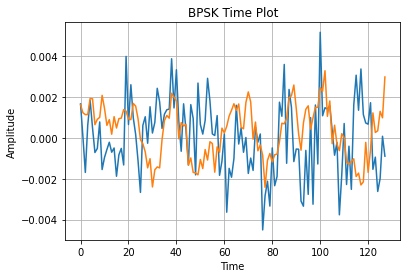

In [17]:
# Ploting BPSK in time domain
plt.plot(Xd[b'BPSK',4][2,0])
plt.plot(Xd[b'BPSK',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("BPSK Time Plot")
plt.grid(b=True, axis='both')

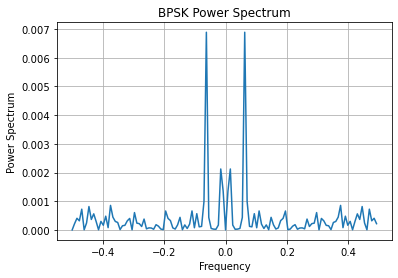

In [18]:
data = Xd[b'BPSK',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("BPSK Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


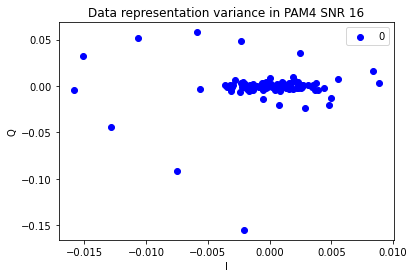

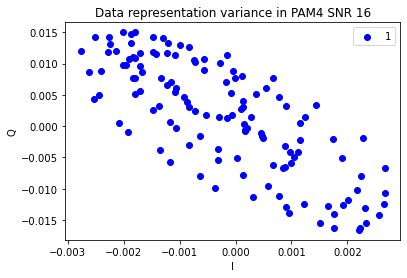

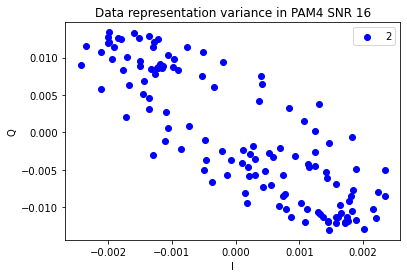

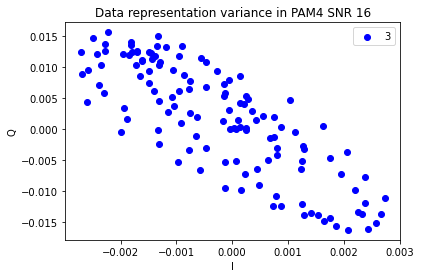

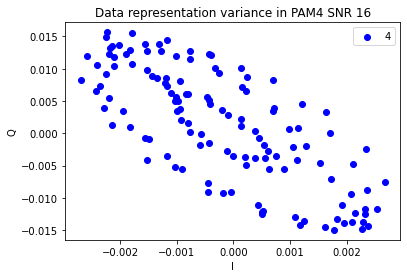

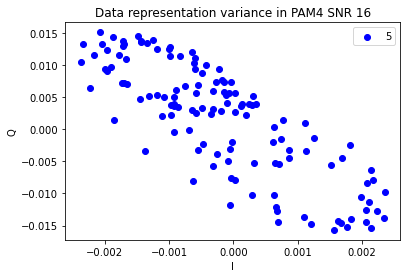

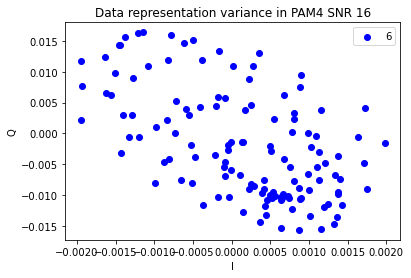

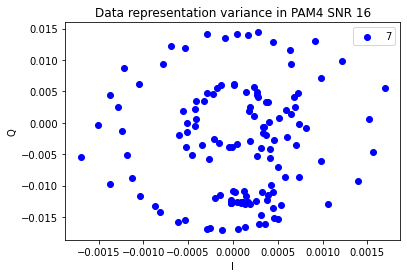

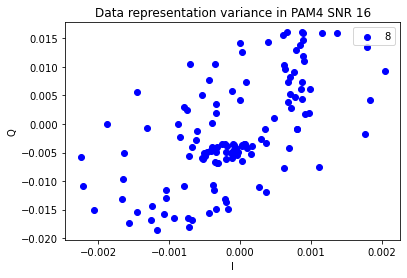

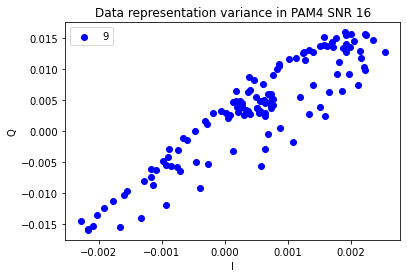

In [19]:
# Ploting for PAM4 in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'PAM4'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in PAM4 SNR 16")
    plt.legend()
    plt.show()

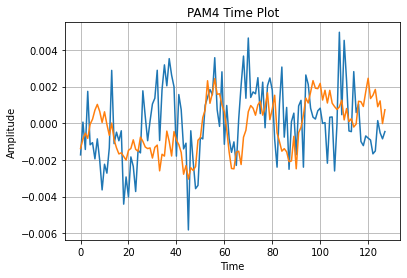

In [20]:
# Ploting PAM4 in time domain
plt.plot(Xd[b'PAM4',4][2,0])
plt.plot(Xd[b'PAM4',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("PAM4 Time Plot")
plt.grid(b=True, axis='both')

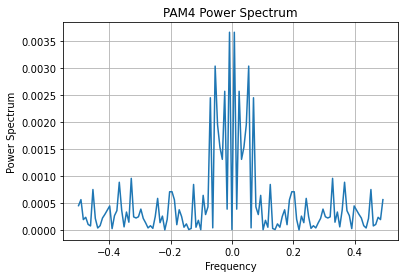

In [21]:
data = Xd[b'PAM4',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("PAM4 Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


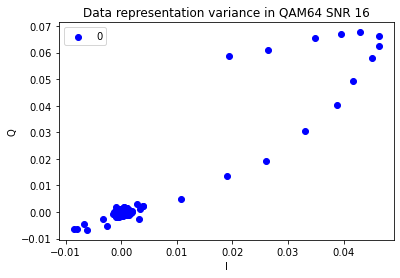

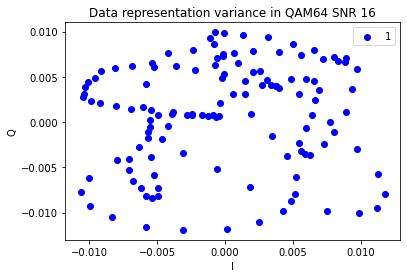

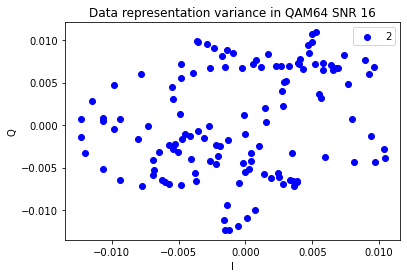

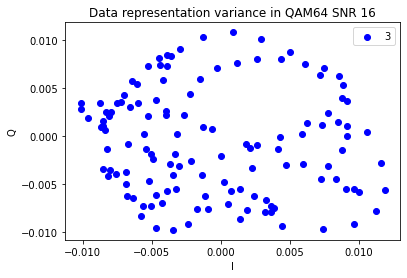

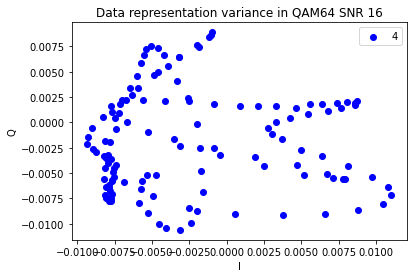

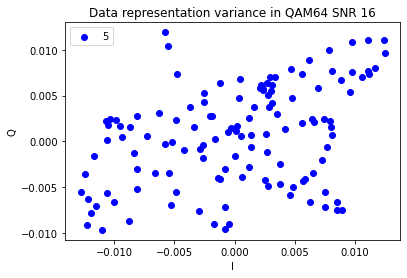

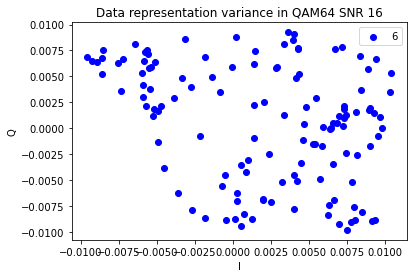

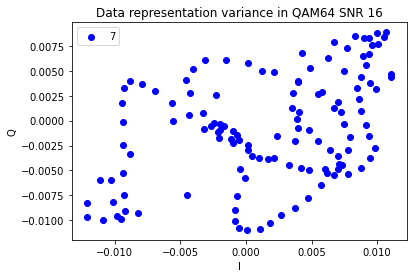

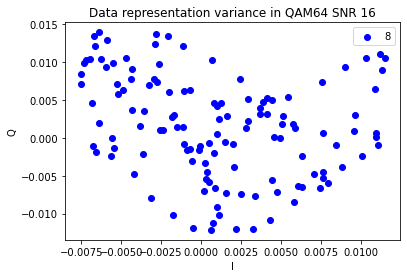

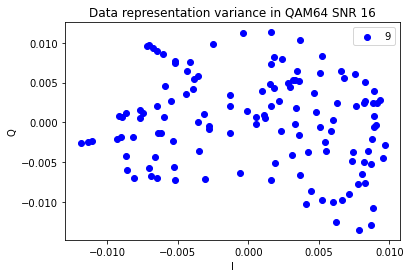

In [22]:
# Ploting for QAM64 in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'QAM64'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in QAM64 SNR 16")
    plt.legend()
    plt.show()

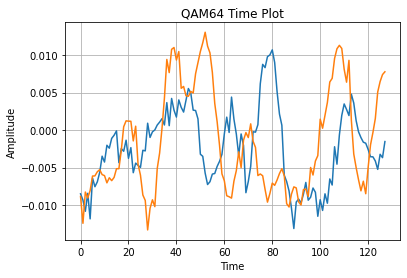

In [23]:
# Ploting for QAM64 in time domain
plt.plot(Xd[b'QAM64',4][6,0])
plt.plot(Xd[b'QAM64',4][7,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("QAM64 Time Plot")
plt.grid(b=True, axis='both')

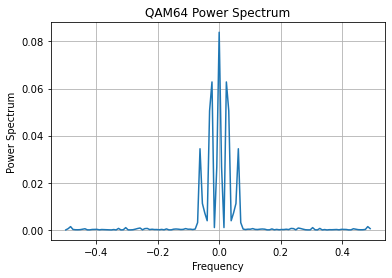

In [24]:
data = Xd[b'QAM64',4][6,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("QAM64 Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


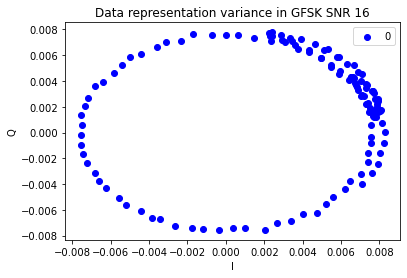

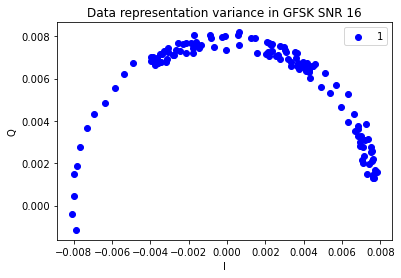

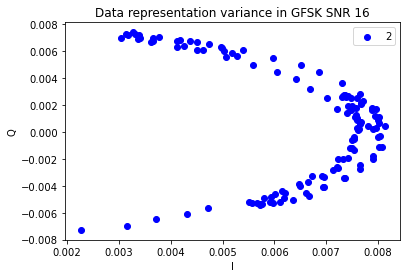

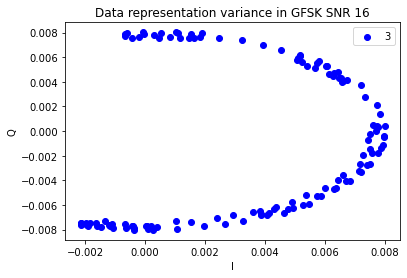

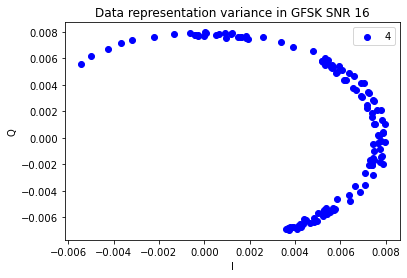

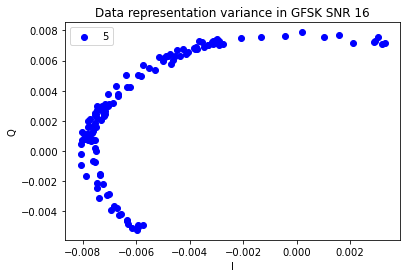

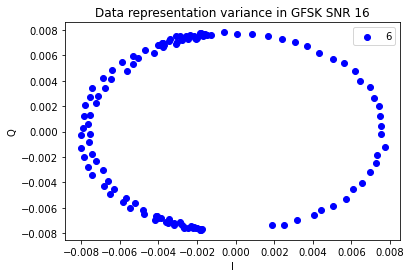

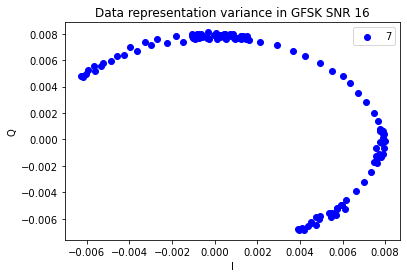

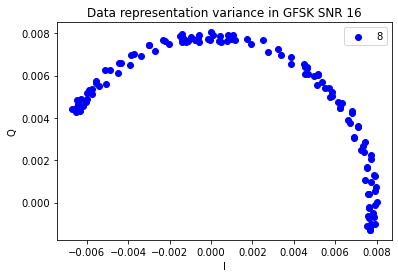

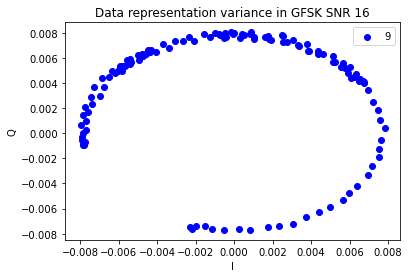

In [25]:
# Ploting for GFSK in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'GFSK'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in GFSK SNR 16")
    plt.legend()
    plt.show()

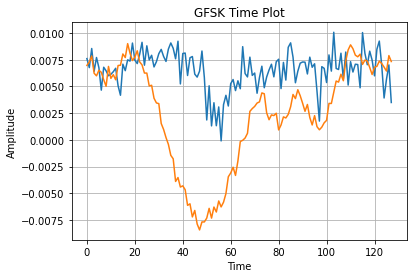

In [26]:
# Ploting GFSK in time domain
plt.plot(Xd[b'GFSK',4][2,0])
plt.plot(Xd[b'GFSK',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("GFSK Time Plot")
plt.grid(b=True, axis='both')

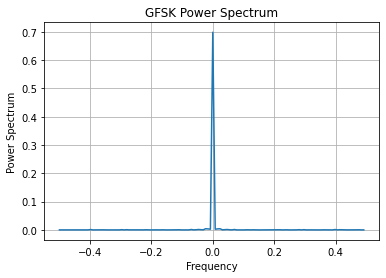

In [27]:
data = Xd[b'GFSK',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("GFSK Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


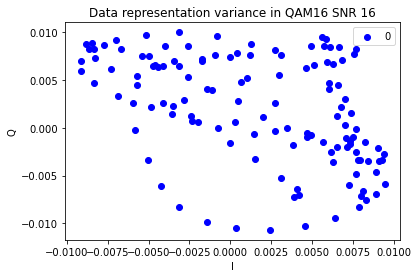

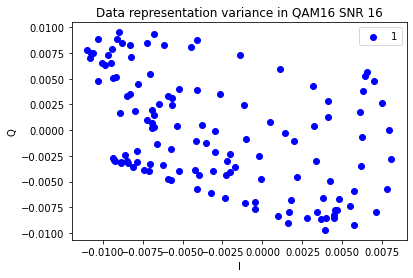

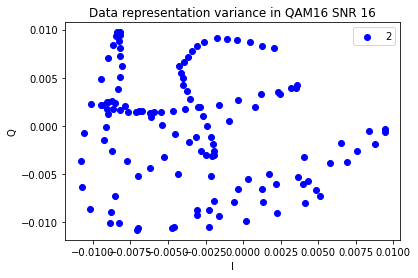

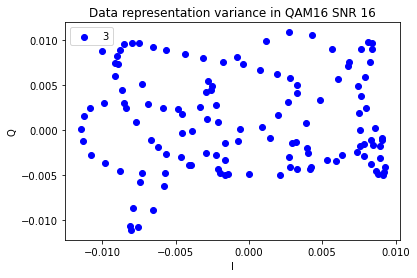

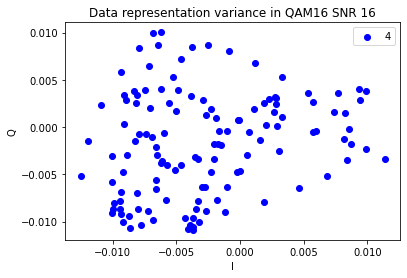

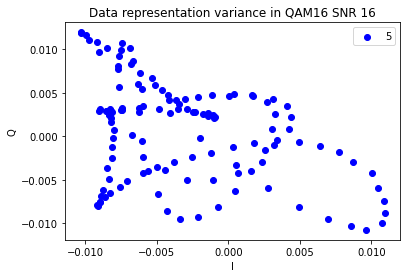

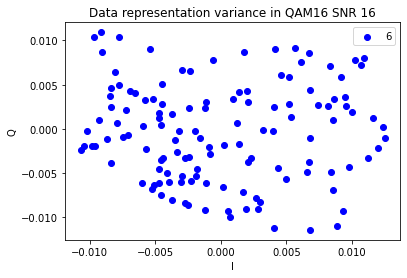

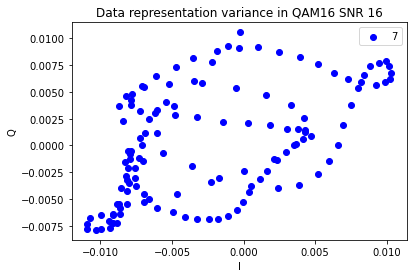

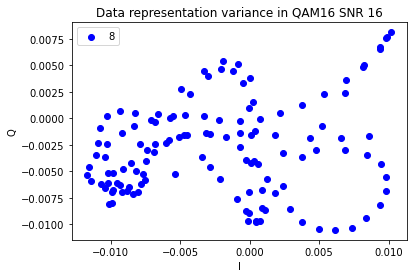

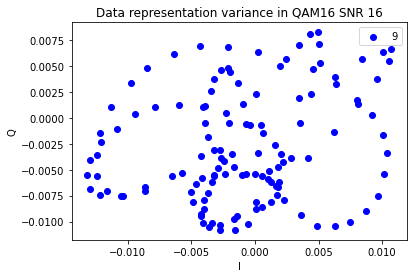

In [28]:
# Ploting for QAM16 in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'QAM16'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in QAM16 SNR 16")
    plt.legend()
    plt.show()

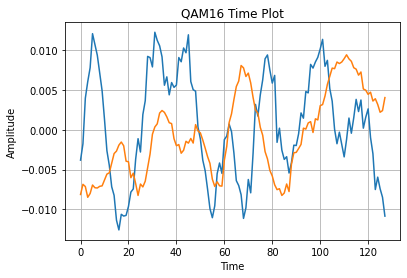

In [29]:
# Ploting for QAM16 in time domain
plt.plot(Xd[b'QAM16',4][2,0])
plt.plot(Xd[b'QAM16',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("QAM16 Time Plot")
plt.grid(b=True, axis='both')

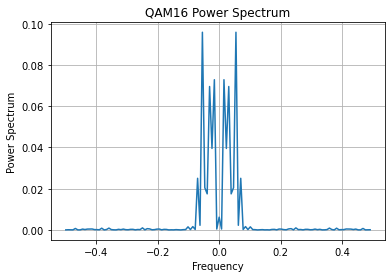

In [30]:
data = Xd[b'QAM16',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("QAM16 Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


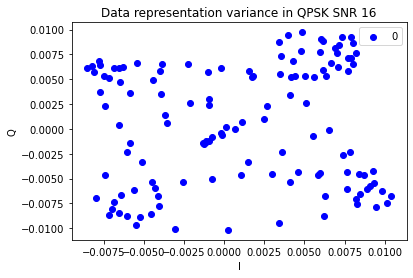

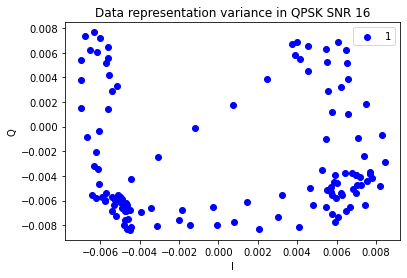

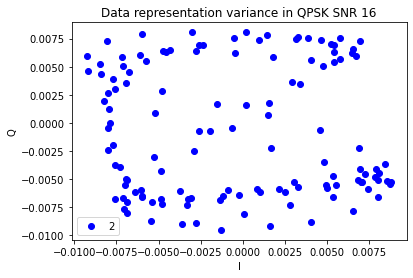

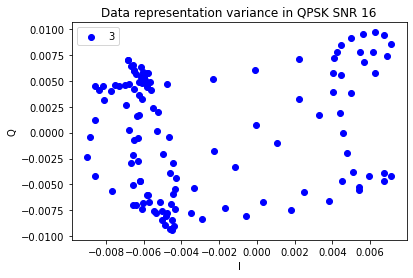

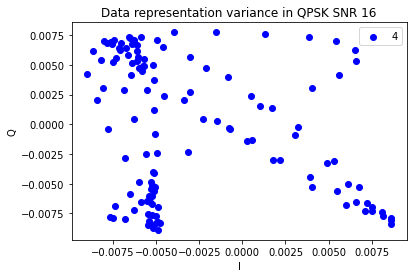

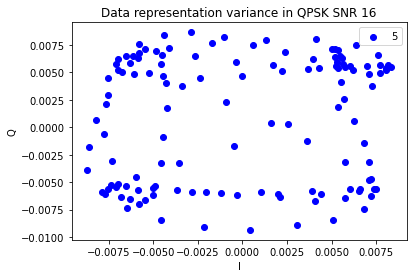

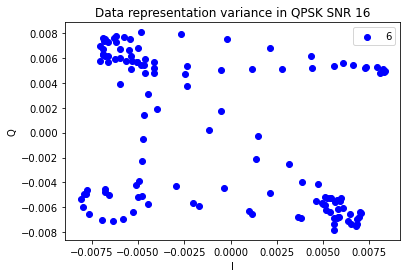

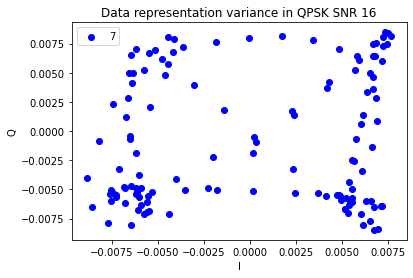

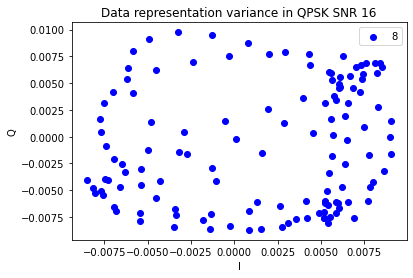

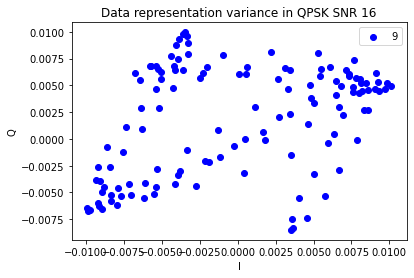

In [31]:
# Ploting for QPSK in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'QPSK'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in QPSK SNR 16")
    plt.legend()
    plt.show()

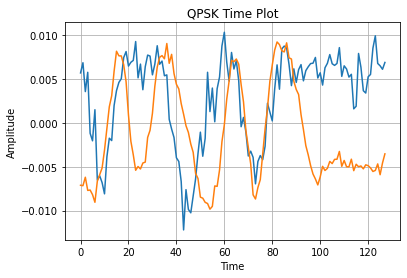

In [32]:
# Ploting for QPSK in time domain
plt.plot(Xd[b'QPSK',4][2,0])
plt.plot(Xd[b'QPSK',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("QPSK Time Plot")
plt.grid(b=True, axis='both')

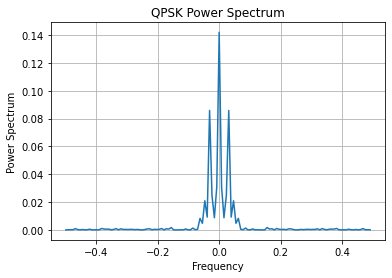

In [33]:
data = Xd[b'QPSK',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("QPSK Power Spectrum")
plt.grid(b=True, axis='both')

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


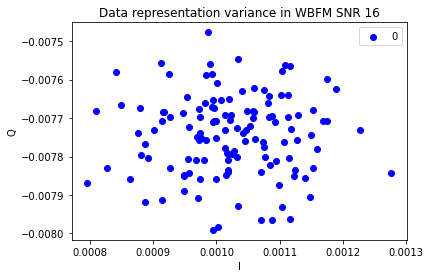

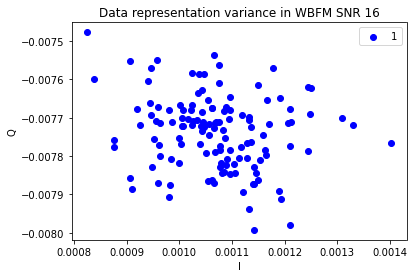

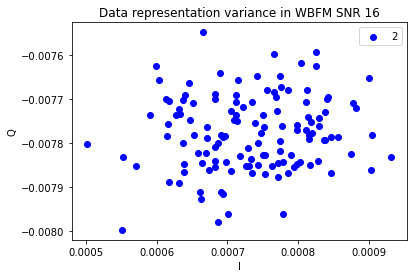

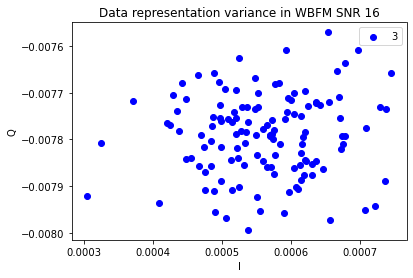

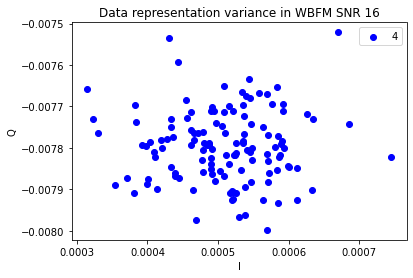

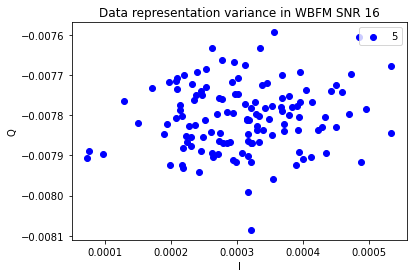

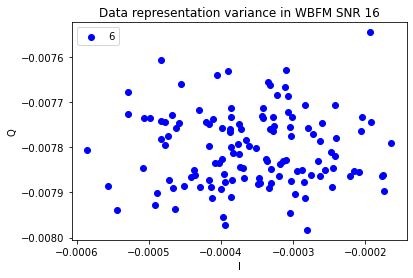

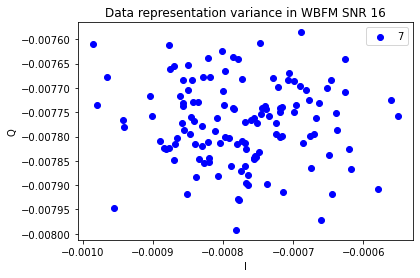

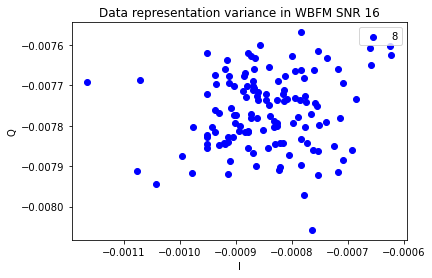

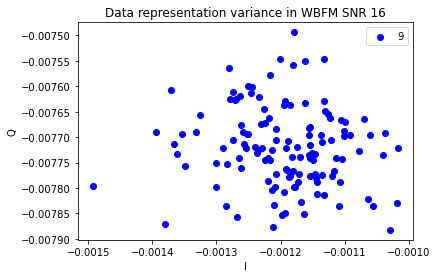

In [34]:
# Ploting for WBFM in I/Q plane
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X1 =[]  
Y1=[]
lbl = []
str=b'WBFM'
for mod in mods:
    for snr in snrs:
        if(mod==str and snr==16):
            test =Xd[(mod,snr)]
            X1.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):
                lbl.append((mod,snr))
                Y1.append([test[0]+1j*test[1]])
X1 = np.vstack(X1)
Y1 = np.vstack(Y1)
print(mods)
print(snrs)



df= pd.DataFrame(lbl,columns=["mod","snr"])
df['snr'].value_counts()
ind = []
for i in range(0,df.shape[0]):
  if(df['snr'][i]==16):
    ind.append(i)
    

for i in range(0,10,1):
    x = X1[i][0]
    y= X1[i][1]
    fig = plt.figure()
    plt.scatter(x,y,c='blue',label=i)
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Data representation variance in WBFM SNR 16")
    plt.legend()
    plt.show()

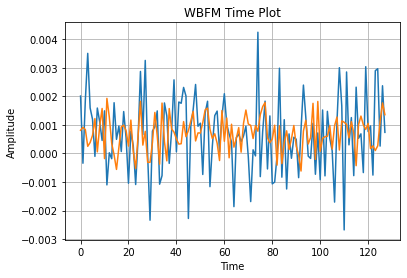

In [35]:
# Ploting for WBFM in time domain
plt.plot(Xd[b'WBFM',4][2,0])
plt.plot(Xd[b'WBFM',8][2,0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("WBFM Time Plot")
plt.grid(b=True, axis='both')

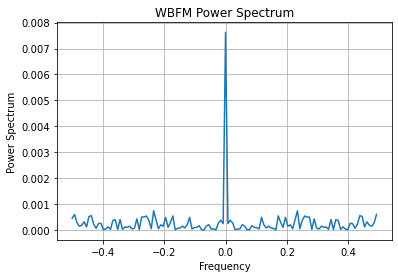

In [36]:
data = Xd[b'WBFM',4][2,0]
power_sp = np.abs(np.fft.fft(data))**2
time_step = 1
fre = np.fft.fftfreq(len(power_sp),time_step)
idx = np.argsort(fre)
plt.plot(fre[idx],power_sp[idx])
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("WBFM Power Spectrum")
plt.grid(b=True, axis='both')

In [37]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(mods)
print(snrs)

[b'8PSK', b'AM-DSB', b'AM-SSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16', b'QAM64', b'QPSK', b'WBFM']
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [38]:
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples // 2
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), train_idx)))
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))

In [39]:
in_shp = list(X_train.shape[1:])
print(X_train.shape, in_shp)
classes = mods

(110000, 2, 128) [2, 128]


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization,LSTM


dr = 0.4 # dropout rate (%)
model = Sequential()
model.add(Reshape([1]+in_shp, input_shape=in_shp))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(256, 1, 3, padding='valid', activation="relu", name="conv1", kernel_initializer='glorot_uniform',data_format='channels_first'))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(80, 2, 3, padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format='channels_first'))
model.add(Dropout(dr))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense( len(classes), kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1, 2, 128)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 1, 6, 128)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 2, 43)        512       
_________________________________________________________________
dropout (Dropout)            (None, 256, 2, 43)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 256, 6, 43)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 80, 2, 14)         82000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 2, 14)         0

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D , Reshape , ZeroPadding2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
# Set up some params 
nb_epoch = 200    # number of epochs to train on
batch_size = 1024  # training batch size

# perform training ...
#   - call the main training loop in keras for our network+dataset
filepath = 'convmodrecnets_CNN2_0.5.wts.h5'
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
   # show_accuracy=False,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])
# we re-load the best weights once training is finished
model.load_weights(filepath)

Epoch 1/200
108/108 - 3s - loss: 1.7205 - val_loss: 1.7159
Epoch 2/200
108/108 - 3s - loss: 1.7204 - val_loss: 1.7173
Epoch 3/200
108/108 - 3s - loss: 1.7210 - val_loss: 1.7179
Epoch 4/200
108/108 - 2s - loss: 1.7221 - val_loss: 1.7169
Epoch 5/200
108/108 - 2s - loss: 1.7243 - val_loss: 1.7200
Epoch 6/200
108/108 - 2s - loss: 1.7193 - val_loss: 1.7213


In [224]:
# Show simple version of performance
score = model.evaluate(X_test, Y_test,  verbose=0, batch_size=batch_size)
print (score)

1.7159019708633423


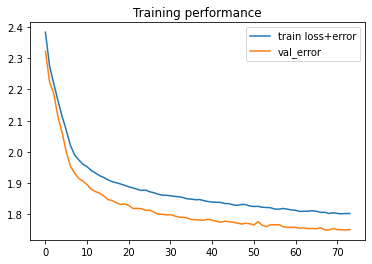

In [43]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [179]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

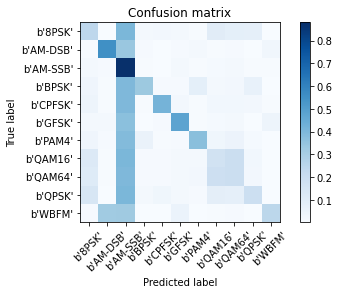

In [225]:
# Plot confusion matrix
test_Y_hat = model.predict(X_test, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

SNR:  -20
Overall Accuracy:  0.09240622140896615
SNR:  -18
Overall Accuracy:  0.0930063578564941
SNR:  -16
Overall Accuracy:  0.09062952243125905
SNR:  -14
Overall Accuracy:  0.0885961746661855
SNR:  -12
Overall Accuracy:  0.09972652689152234
SNR:  -10
Overall Accuracy:  0.09774302470232805
SNR:  -8
Overall Accuracy:  0.1085798273011207
SNR:  -6
Overall Accuracy:  0.14406158357771262
SNR:  -4
Overall Accuracy:  0.20850277264325323
SNR:  -2
Overall Accuracy:  0.29626269956458634
SNR:  0
Overall Accuracy:  0.4333941605839416
SNR:  2
Overall Accuracy:  0.5112686295892402
SNR:  4
Overall Accuracy:  0.5967327459618208
SNR:  6
Overall Accuracy:  0.6395306859205776
SNR:  8
Overall Accuracy:  0.6499549143372407
SNR:  10
Overall Accuracy:  0.6586520947176685
SNR:  12
Overall Accuracy:  0.6554408835777658
SNR:  14
Overall Accuracy:  0.6643292120317402
SNR:  16
Overall Accuracy:  0.6617194570135747
SNR:  18
Overall Accuracy:  0.6570657065706571


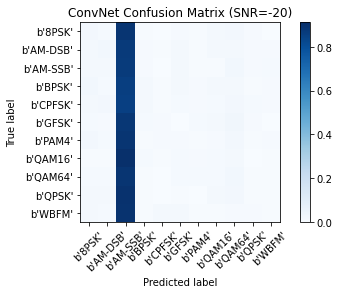

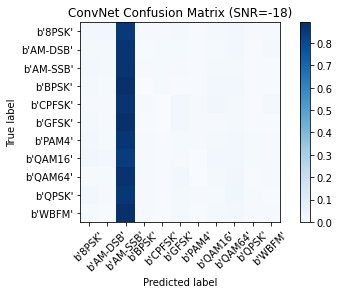

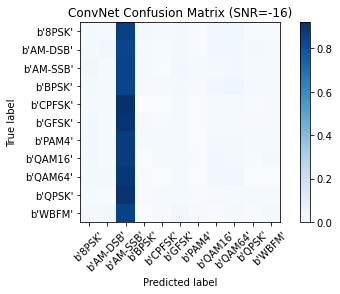

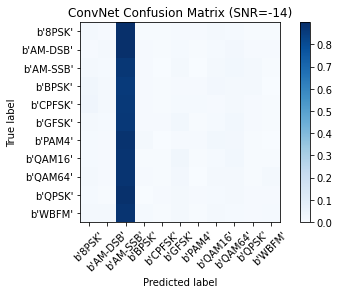

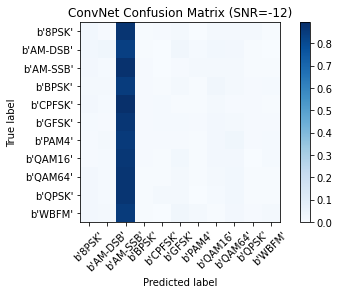

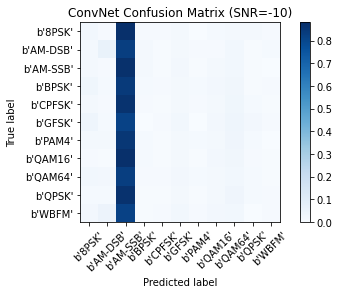

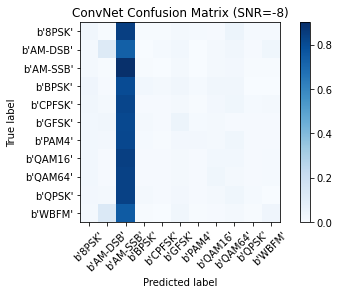

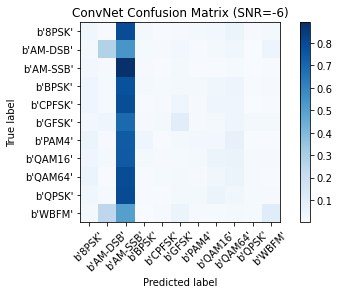

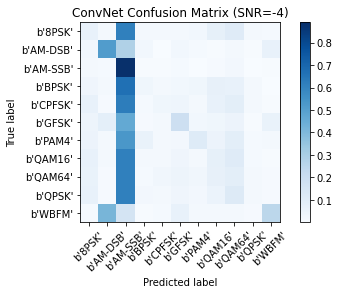

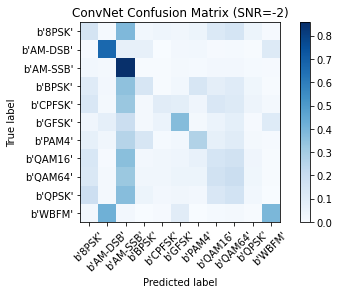

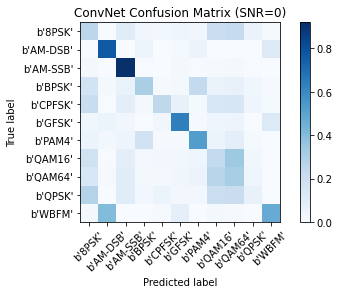

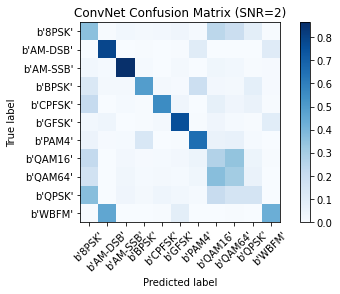

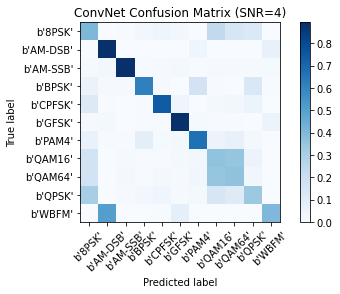

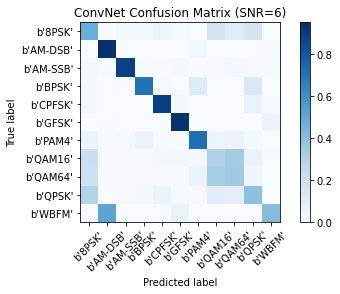

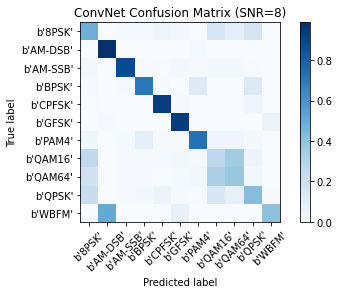

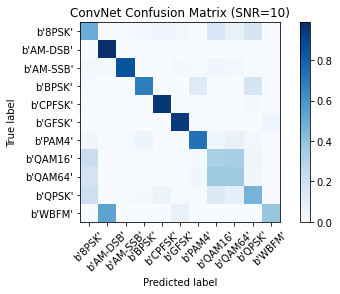

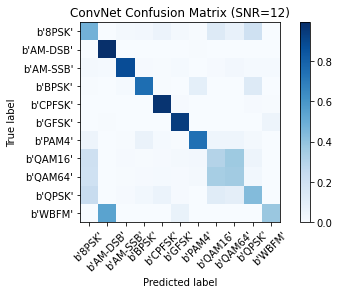

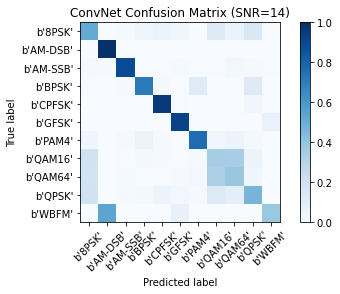

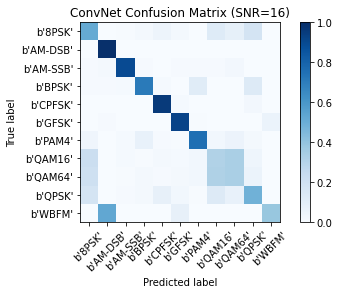

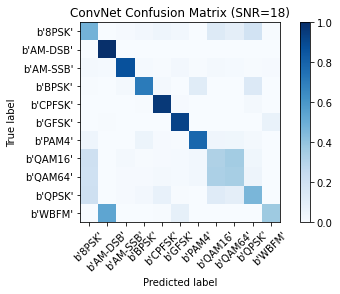

In [226]:

# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = list(map(lambda x: lbl[x][1], test_idx))
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    
    
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
       
        
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("SNR: ", snr)
    print("Overall Accuracy: ", cor / (cor+ncor))
    
    acc[snr] = 1.0*cor/(cor+ncor)

Text(0.5, 1.0, 'CNN Classification Accuracy on dataset RadioML 2016.10 Alpha')

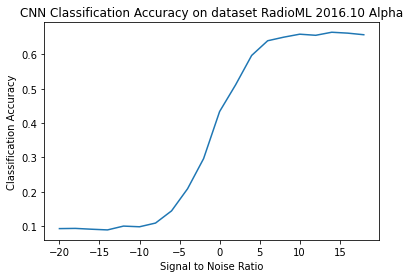

In [227]:
plt.plot(snrs, list(map(lambda x: acc[x], snrs)))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN Classification Accuracy on dataset RadioML 2016.10 Alpha")